In [1]:
# Access the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from zipfile import ZipFile
import PIL
import tensorflow as tf

In [3]:
# Path to your dataset
train_dir = '/content/drive/MyDrive/Dataset/fruit-360/Training'
test_dir = '/content/drive/MyDrive/Dataset/fruit-360/Testing'
# Check if the data directory exists
if not os.path.exists(train_dir):
    print(f"Data directory {train_dir} does not exist.")
elif not os.path.exists(test_dir):
    print(f"Testing data directory {test_dir} does not exist.")
else:
    # Count the number of images
    train_dir_path = pathlib.Path(train_dir)
    train_image_count = len(list(train_dir_path.glob('*/*.jpg')))
    print(f"Number of images in training directory: {train_image_count}")

    # Count the number of images in testing directory
    test_dir_path = pathlib.Path(test_dir)
    test_image_count = len(list(test_dir_path.glob('*/*.jpg')))
    print(f"Number of images in testing directory: {test_image_count}")

Number of images in training directory: 3835
Number of images in testing directory: 1277


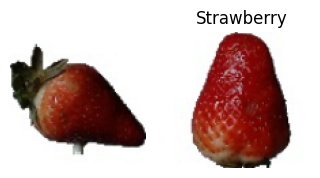

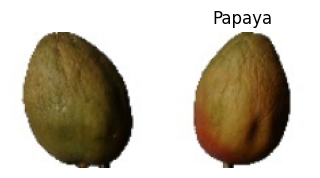

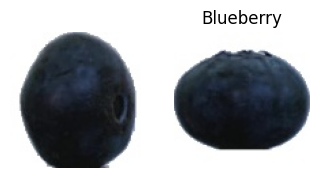

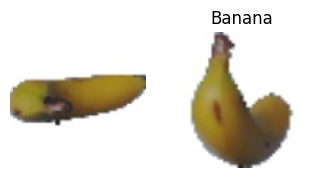

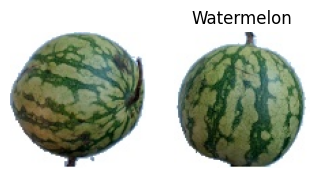

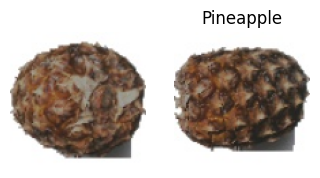

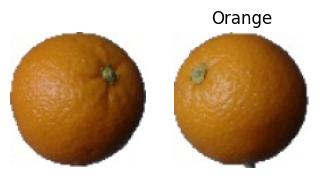

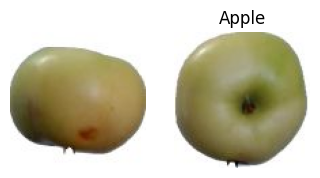

In [4]:
import os
import random
import matplotlib.pyplot as plt

def plot_class_images(class_dir, num_images=2):
  images = os.listdir(class_dir)
  random.shuffle(images)

  plt.figure(figsize=(6, 6))
  for i in range(num_images):
    img_path = os.path.join(class_dir, images[i])
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.title(class_dir.split('/')[-1])  # Extract class name from directory
  plt.show()

# Path to your dataset
data_dir = '/content/drive/MyDrive/Dataset/fruit-360/Training'

# Get a list of class directories
class_dirs = os.listdir(data_dir)

# Display images for the first 8 classes
for class_dir in class_dirs[:8]:
  class_path = os.path.join(data_dir, class_dir)
  plot_class_images(class_path)

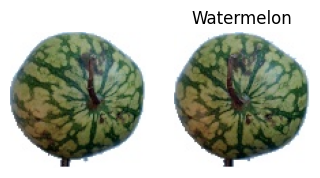

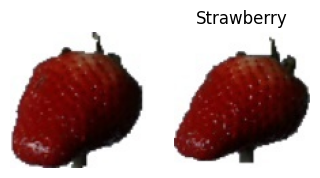

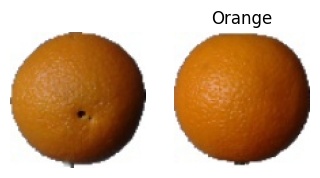

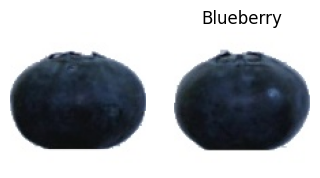

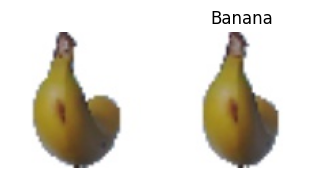

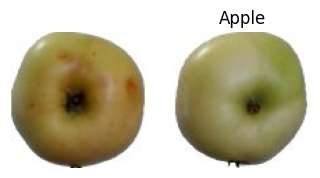

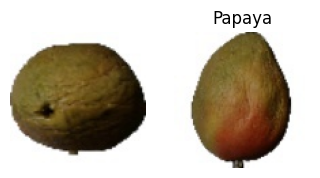

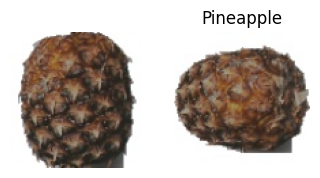

In [ ]:
import os
import random
import matplotlib.pyplot as plt

def plot_class_images(class_dir, num_images=2):
  images = os.listdir(class_dir)
  random.shuffle(images)

  plt.figure(figsize=(6, 6))
  for i in range(num_images):
    img_path = os.path.join(class_dir, images[i])
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.title(class_dir.split('/')[-1])  # Extract class name from directory
  plt.show()

# Path to your dataset
data_dir = '/content/drive/MyDrive/Dataset/fruit-360/Testing'

# Get a list of class directories
class_dirs = os.listdir(data_dir)

# Display images for the first 8 classes
for class_dir in class_dirs[:8]:
  class_path = os.path.join(data_dir, class_dir)
  plot_class_images(class_path)

In [5]:
def count_images_per_class(directory):

  class_counts = {}
  for root, _, files in os.walk(directory):
    class_name = os.path.basename(root)
    if class_name:
      image_count = len(files)
      class_counts[class_name] = image_count
  return class_counts

# Example usage:
train_dir = '/content/drive/MyDrive/Dataset/fruit-360/Training'
test_dir = '/content/drive/MyDrive/Dataset/fruit-360/Testing'

train_class_counts = count_images_per_class(train_dir)
test_class_counts = count_images_per_class(test_dir)

print("Training set class counts:")
print(train_class_counts)

print("\nTesting set class counts:")
print(test_class_counts)

Training set class counts:
{'Training': 0, 'Strawberry': 490, 'Papaya': 490, 'Blueberry': 460, 'Banana': 488, 'Watermelon': 473, 'Pineapple': 488, 'Orange': 477, 'Apple': 469}

Testing set class counts:
{'Testing': 0, 'Watermelon': 157, 'Strawberry': 164, 'Orange': 160, 'Blueberry': 154, 'Banana': 166, 'Apple': 146, 'Papaya': 164, 'Pineapple': 166}


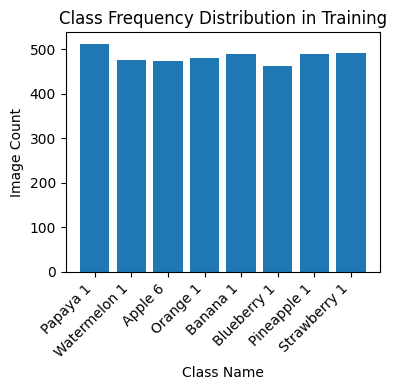

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary named `class_counts` containing class names as keys and image counts as values

# Example class counts (replace with your actual data)
class_counts = {'Papaya 1': 512, 'Watermelon 1': 475, 'Apple 6': 473, 'Orange 1': 479, 'Banana 1': 490, 'Blueberry 1': 462, 'Pineapple 1': 490, 'Strawberry 1': 492}

# Extract class names and image counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Create a bar chart
plt.figure(figsize=(4, 4))
plt.bar(class_names, image_counts)
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.title("Class Frequency Distribution in Training")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the bar chart
plt.tight_layout()
plt.show()

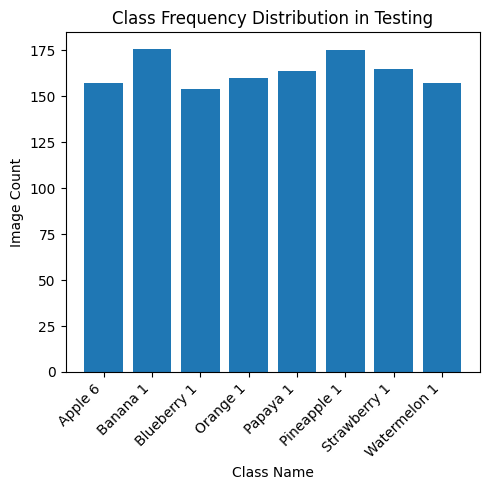

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary named `class_counts` containing class names as keys and image counts as values

# Example class counts (replace with your actual data)
class_counts = {'Apple 6': 157, 'Banana 1': 176, 'Blueberry 1': 154, 'Orange 1': 160, 'Papaya 1': 164, 'Pineapple 1': 175, 'Strawberry 1': 165, 'Watermelon 1': 157}

# Extract class names and image counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Create a bar chart
plt.figure(figsize=(5, 5))
plt.bar(class_names, image_counts)
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.title("Class Frequency Distribution in Testing")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the bar chart
plt.tight_layout()
plt.show()

In [6]:
batch_size = 32
img_height = 100
img_width = 100

In [8]:
train_dir = '/content/drive/MyDrive/Dataset/fruit-360/Training' # Define train_dir with the correct path

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3835 files belonging to 8 classes.
Using 3068 files for training.


In [9]:
import tensorflow as tf

test_dir = '/content/drive/MyDrive/Dataset/fruit-360/Testing'

# Load the test dataset directly, without using validation_split or subset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Use the test directory here
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1277 files belonging to 8 classes.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3835 files belonging to 8 classes.
Using 767 files for validation.


In [11]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['Apple', 'Banana', 'Blueberry', 'Orange', 'Papaya', 'Pineapple', 'Strawberry', 'Watermelon']


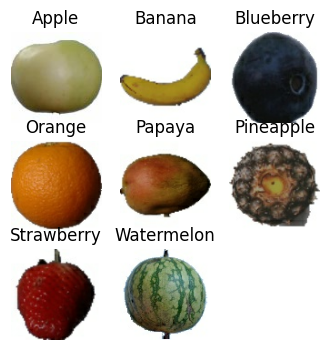

In [ ]:
plt.figure(figsize=(4, 4))
for images, labels in train_ds.take(num_classes):
  for i in range(9):
    # Check if images with label i exist in the batch
    if i in labels:
        idx = np.where(labels == i)[0][0]  # Find the index of the first image with label i
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx].numpy().astype('uint8'))
        plt.title(class_names[labels[idx]])
        plt.axis('off')
plt.show()

In [12]:
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 100, 100, 3)
(32,)


In [ ]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
data_dir = '/content/drive/MyDrive/Dataset/fruit-360/Training'
num_images_per_class = 1
classes = os.listdir(data_dir)
selected_classes = random.sample(classes, 8)
for class_name in selected_classes:
  class_dir = os.path.join(data_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Pineapple/r_133_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Strawberry/138_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Apple/r0_136_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Orange/282_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Blueberry/276_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Papaya/137_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Watermelon/116_100.jpg, Dimensions: 100x100x3
Image: /content/drive/MyDrive/Dataset/fruit-360/Training/Banana/47_100.jpg, Dimensions: 100x100x3


# Preprocessing/Setting Up Base Model

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

The code optimizes the train_ds and val_ds datasets using caching and prefetching to improve performance during model training.

In [ ]:
!pip install tensorflow

In [15]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

This code defines a data augmentation pipeline using TensorFlow's Keras API.

In [16]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

 imports the preprocess_input function specifically designed for ResNet model.This function is crucial for preparing images before feeding them into a ResNet model. It ensures that the input images are compatible with the way ResNet was trained.(Color channel adjustments,Normalization).

In [ ]:
base_model = tf.keras.applications.resnet.ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Defines and congigures a ResNet50 model as the base model.

In [ ]:
base_model.trainable = False

It prevents the weights of the pre-trained ResNet50 model from being updated during training.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)

These lines define two crucial layers that will be added on top of the base ResNet50 model to create my final model.
*   Global_average_layer-This layer reduces the spatial dimensions of the output from the base model.
*   prediction_layer-This is the final classification layer of my model.It takes the output of Global_average_layerand applies a softmax function.

# Building the Model

In [ ]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

This code defines a Keras model for image classification using transfer learning. The model takes images of size 100x100 with 3 color channels as input. It utilizes data augmentation, a pre-trained ResNet50 base model (with frozen weights), global average pooling, and dropout for regularization. The model outputs predictions for an unspecified number of classes

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

This code configures the model for training by specifying the optimizer, loss function, and metrics.

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 100, 100, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 100, 100)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 100, 100)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 100, 100)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 100, 100, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 100, 100, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 4, 4, 2048)     │     23,587,712 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │         16,392 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,604,104 (90.04 MB)

 Trainable params: 16,392 (64.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

*  Input Layer: The first layer, input_layer_1, defines the input shape of the model as (None, 100, 100, 3), indicating that the model expects images with a height and width of 100 pixels and 3 channels (RGB).
*   Sequential Layer: The sequential_1 layer is likely a placeholder or a custom sequence of layers. Its output shape is the same as the input, suggesting it might not perform any transformations.
*   GetItem Layers: These layers might be used to extract specific elements from the input or intermediate representations. Their purpose is unclear without more context.
*   Stack Layer: The stack layer likely combines the outputs of the get_item layers into a single tensor.
*   Add Layer: This layer adds the output of the stack layer to the output of the sequential_1 layer.
*  ResNet50 Layer: The core of the model, a pre-trained ResNet50 network. It produces an output of (None, 4, 4, 2048), indicating that it extracts high-level features from the input.
*   Global Average Pooling: Reduces the spatial dimensions of the ResNet50 output to a single vector.
*   Dropout Layer: Introduces dropout regularization to prevent overfitting.
*   Dense Layer: The final layer, a fully connected layer with 8 output neurons, likely representing the number of classes in the classification task.

In [ ]:
model.evaluate(val_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.0629 - loss: 3.7084


[3.7347872257232666, 0.06258148699998856]

In [ ]:
epochs = 12

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9997 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 2/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9998 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 3/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9994 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 4/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9998 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 5/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 6/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 7/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 8/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - v

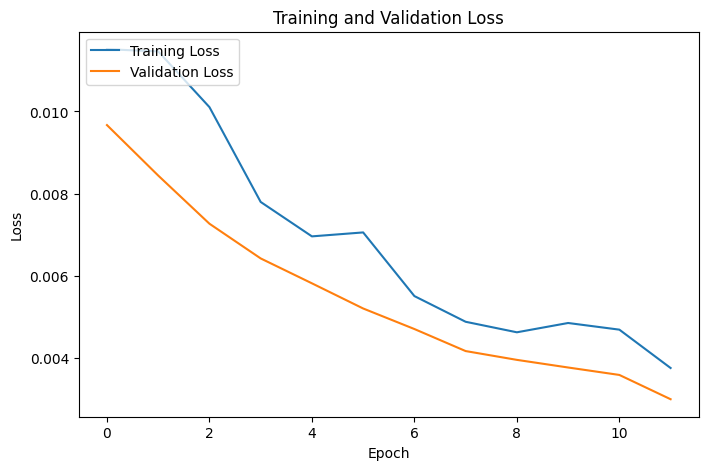

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
np.argmin(val_loss)

11

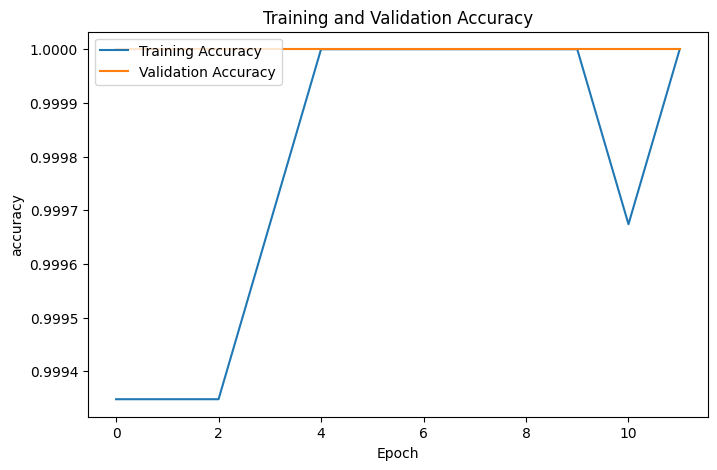

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.show()

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy:', accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 1.0000 - loss: 0.0029
Test accuracy: 1.0


In [ ]:
model.save("my_model.keras")

making predictions

In [17]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/models/my_model.keras')
img = tf.keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Dataset/fruit-360/validation/Strawberry/12_100.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

In [18]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
This image most likely belongs to Strawberry with a 89.15 percent confidence.


orange and papaya

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


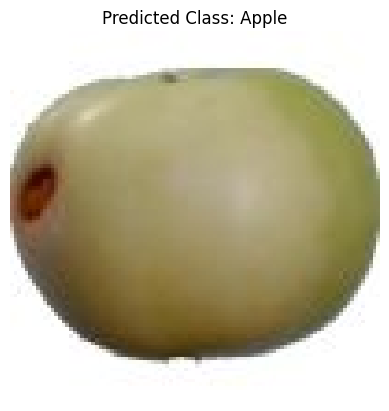

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/models/my_model.keras')
img_height, img_width = 100, 100
img = tf.keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Dataset/fruit-360/validation/Apple/r0_297_100.jpg',
    target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
class_names = ['Apple', 'Banana', 'Blueberry', 'Orange', 'Papaya', 'Pineapple', 'Strawberry', 'Watermelon']
predicted_label = class_names[predicted_class]
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()

Found 1277 images belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 1018s 26s/step


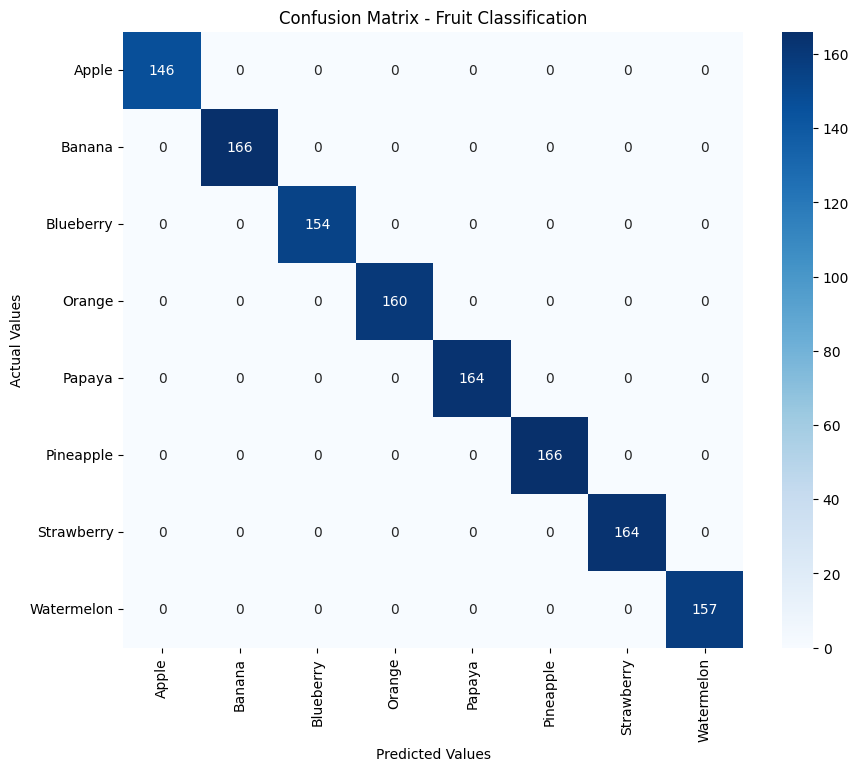

In [21]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd # Added import statement for pandas

# Assuming you already have the trained model, and validation data prepared

# Set up ImageDataGenerator for test dataset WITHOUT rescaling
test_datagen = ImageDataGenerator()  # No rescaling

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/fruit-360/Testing',
    target_size=(100, 100),  # Image size used during training
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: no shuffling to match y_test with y_pred correctly
)

# Getting the true labels (y_test)
y_test = test_generator.classes

# Predicting the test set results (y_pred)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class indices

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Defining the labels for your 8 fruit classes
# Removed "Papaya" to match the number of classes in the confusion matrix
labels = ['Apple', 'Banana', 'Blueberry', 'Orange', 'Papaya', 'Pineapple', 'Strawberry', 'Watermelon']

# Creating a dataframe for the confusion matrix for easier plotting
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Fruit Classification')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()